# MOwNiT 

## Laboratorium 4

### Interpolacja

Przed uruchomieniem trzeba zainstalować pakiet:

```julia
Pkg.add("Interpolations")
```

In [3]:
#using Pkg
#Pkg.add("Interpolations")

In [4]:
using Plots

In [5]:
# wylosowanie węzłów interpolacji
xs =  1:1:10
ys = [rand() for x in xs]

10-element Vector{Float64}:
 0.03247924315133055
 0.5911747691904813
 0.9430790747389827
 0.7302580723151287
 0.13041457753997932
 0.9710865705097724
 0.9079585423604074
 0.3495318563890857
 0.9601966624558401
 0.16310874497103567

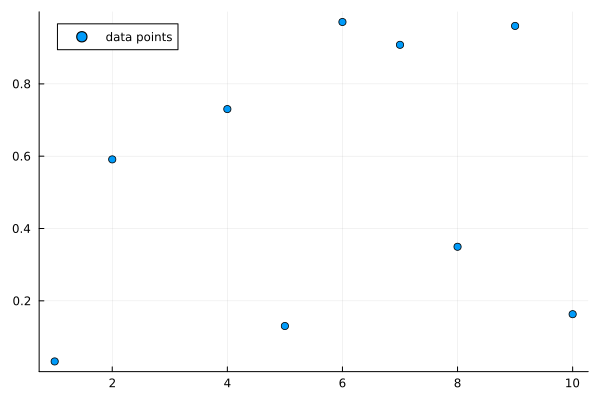

In [6]:
scatter(xs,ys, label="data points")

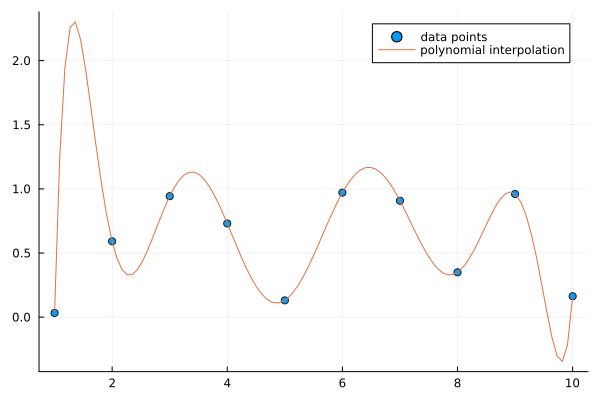

In [7]:
# interpolacja wielomianowa w pakiecie Polynomials
# https://juliamath.github.io/Polynomials.jl/stable/
#import Pkg; Pkg.add("Polynomials")
using Polynomials
f=fit(xs, ys)
plot!(f,  extrema(xs)..., label="polynomial interpolation")

In [8]:
# gęste punkty do rysowania wykresów funkcji interpolujacych
xsf=1:0.01:10

1.0:0.01:10.0

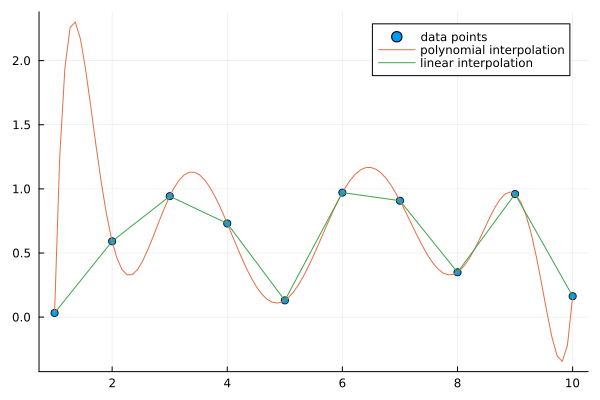

In [9]:
#  interpolacja liniowa z pakietu Interpolations - przykład
using Interpolations
interp_linear = LinearInterpolation(xs, ys)
ysf=[interp_linear(x) for x in xsf]
plot!(xsf,ysf, label="linear interpolation")

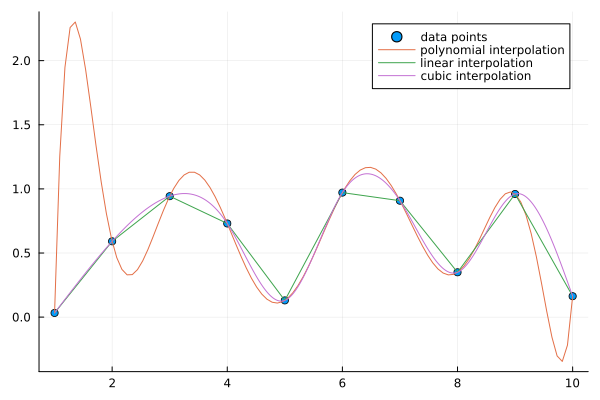

In [10]:
#  interpolacja szescienna 
interp_cubic = CubicSplineInterpolation(xs, ys)
ysf2=[interp_cubic(x) for x in xsf]
plot!(xsf,ysf2, label="cubic interpolation")

In [11]:
#Interpolacja szescienna to BSpline z warunkami brzegowymi Line i OnGrid. 
#Więcej o konfiguracji warunkow brzegowych w
# dokumentacji https://github.com/JuliaMath/Interpolations.jl/blob/master/doc/Interpolations_algebra.pdf
interp_cubic

10-element extrapolate(scale(interpolate(OffsetArray(::Vector{Float64}, 0:11), BSpline(Cubic(Line(OnGrid())))), (1:1:10,)), Throw()) with element type Float64:
 0.03247924315133052
 0.5911747691904813
 0.9430790747389827
 0.7302580723151286
 0.13041457753997926
 0.9710865705097725
 0.9079585423604075
 0.3495318563890856
 0.9601966624558402
 0.16310874497103567

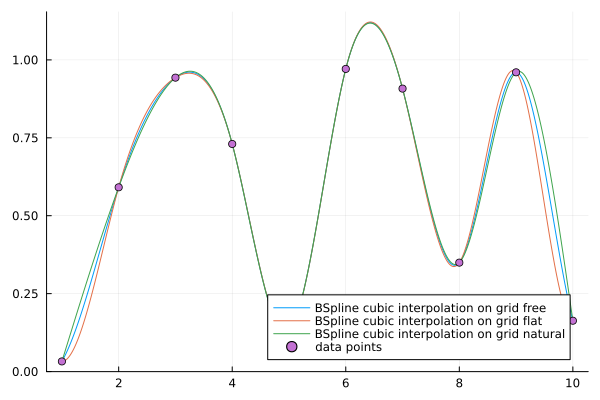

In [12]:
# Przyklad konfiguracji  BSpline-ów
itp = interpolate(ys, BSpline(Cubic(Free(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot(xsf,ysf3, label="BSpline cubic interpolation on grid free")
itp = interpolate(ys, BSpline(Cubic(Flat(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot!(xsf,ysf3, label="BSpline cubic interpolation on grid flat")
itp = interpolate(ys, BSpline(Cubic(Natural(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot!(xsf,ysf3, label="BSpline cubic interpolation on grid natural")

scatter!(xs,ys, label="data points")


### Zadania
1. Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. <b>(1 pkt)</b>

1. Zrobic to samo dla metody  Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   1. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x za pomocą  <b>schematu Hornera dla postaci Newtona </b> <b>(2 pkt)</b>

1. Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego? <b>(1 pkt)</b>

1. Porównać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyć wartość średnią oraz oszacować błąd pomiaru za pomocą odchylenia standardowego; wyniki przedstawić na wykresach. <b>(2 pkt)</b>

1. Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.<b>(1 pkt)</b>

1. Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej. <b>Zademonstrować  efekt Rungego</b> <b>(1 pkt)</b>. 

In [13]:
#Pkg.add("Plots")
#Pkg.add("Polynomials")
#Pkg.add("Measures")
#Pkg.add("LinearAlgebra")
#Pkg.add("Statistics")
#Pkg.add("DataFrames")
#Pkg.add("Measures")
using Plots, Interpolations, Polynomials, LinearAlgebra, Statistics, DataFrames, Measures

# Test Params

In [14]:
xsf = 0:1:10
ysf = [rand() for x in xsf]
test = 0:0.01:10

0.0:0.01:10.0

# Lagrange Method

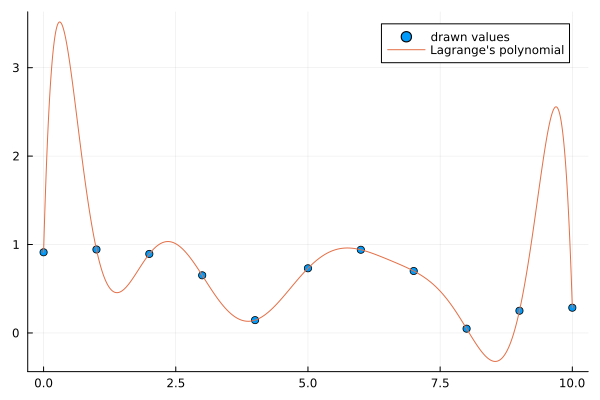

In [16]:
function Lagrange(xsf,ysf,s)
    P = 0
    len = size(xsf)[1]
    for i in 1:len
        L = 1
        for j in 1:len
            if j != i
                L *= (s-xsf[j])/(xsf[i]-xsf[j])
            end
        end
        P += (ysf[i]*L)
    end
    return P
end


res = [Lagrange(xsf,ysf,x) for x in test]
scatter(xsf, ysf, label="drawn values")
plot!(test, res, label="Lagrange's polynomial")

# Newton's Method

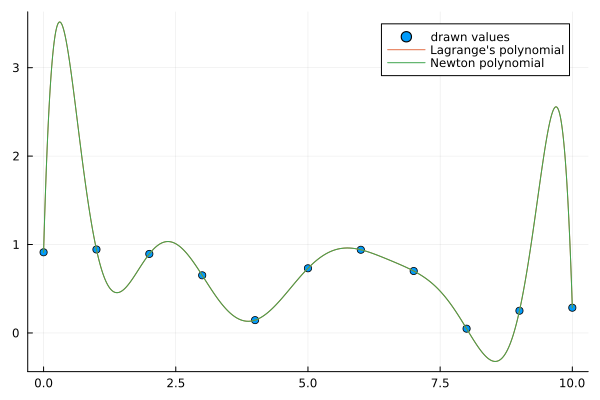

In [17]:
function NewtonInterpolation(xsf, ysf)
    T = Float64[]
    n = size(xsf)[1]
    for a in 1:n
        push!(T,ysf[a])
        for i in 1:a-1
            nom = T[end]-T[end-a+1]
            den = xsf[a] - xsf[a-i]
            push!(T,nom/den)
        end
    end
    newt = Float64[]
    k = 0
    for i in 1:n
        k = k + i
        push!(newt,T[k])
    end
    return newt
end

function Newton(newt,xsf,x)
    n = size(xsf)[1]
    b = newt[n]
    for i=1:n-1
        b = newt[n-i] + b*(x-xsf[n-i])
    end
    return b
end


table = NewtonInterpolation(xsf,ysf)
newton = [Newton(table,xsf,x) for x in test]
plot!(test,newton,label="Newton polynomial")

# Using `Polynomials` package

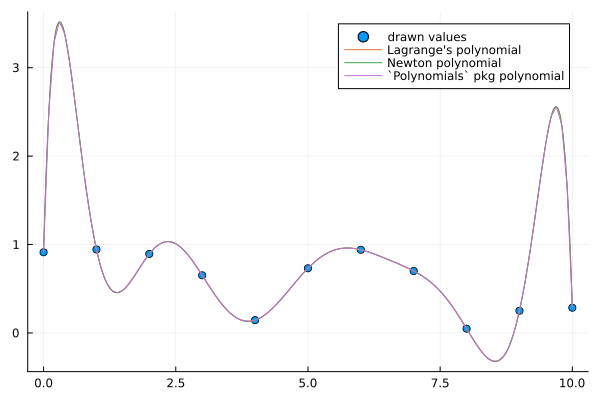

In [18]:
f=fit(xsf, ysf)
plot!(f, minimum(xsf), maximum(xsf), label="`Polynomials` pkg polynomial")

# Time comparison

In [19]:
df = DataFrame(Nodes = Int[], Lagr = Float64[], Newt = Float64[], Newt_point = Float64[], Polyn = Float64[], Polyn_point = Float64[])
for i in 10:100:1000
    for j in 1:12
        width = 10/i
        x_axis = 0:width:10
        y_axis = [rand() for x in x_axis]
        test = 0:0.01:10
        lagr, time1 = @timed [Lagrange(x_axis,y_axis,x) for x in test]
        newt, time2 = @timed NewtonInterpolation(x_axis, y_axis)
        newt_point, time3 = @timed[Newton(newt,x_axis,x) for x in test]
        polyn, time4 = @timed fit(x_axis,y_axis)
        polyn_point, time5 = @timed [polyn(x) for x in test]
        if j > 2
            push!(df,(i,time1,time2,time3,time4,time5))
        end
    end
end

In [20]:
df2 = combine(groupby(df,:Nodes),:Lagr => mean => :Lagr_mean,:Lagr => std => :Lagr_std,
    :Newt => mean => :Newt_mean, :Newt => std => :Newt_std,
    :Newt_point => mean => :Newt_point_mean, :Newt_point => std => :Newt_point_std,
    :Polyn => mean => :Polyn_mean, :Polyn => std => :Polyn_std,
    :Polyn_point => mean => :Polyn_point_mean, :Polyn_point => std => :Polyn_point_std)

Row,Nodes,Lagr_mean,Lagr_std,Newt_mean,Newt_std,Newt_point_mean,Newt_point_std,Polyn_mean,Polyn_std,Polyn_point_mean,Polyn_point_std
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10,0.000317379,4.46854e-6,1.0043e-6,1.13201e-6,1.50041e-5,7.53452e-7,9.582e-7,1.15546e-6,5.6708e-6,6.82396e-7
2,110,0.0594352,0.000447503,2.66375e-5,1.89562e-6,0.000206238,9.63693e-6,1.54626e-5,1.43663e-6,8.28249e-5,3.46377e-6
3,210,0.231154,0.00557625,0.00068835,0.00187907,0.000404983,7.99247e-6,5.03542e-5,3.40341e-6,0.000175179,3.89908e-6
4,310,0.512543,0.00559651,0.00053995,0.00101175,0.000608275,1.19381e-5,9.69958e-5,3.51386e-6,0.000293829,8.80392e-6
5,410,0.935278,0.0219621,0.000516063,0.000228616,0.000832558,2.91765e-5,0.000166258,9.17193e-6,0.000418446,1.72391e-5
6,510,1.43853,0.0454316,0.000778163,0.000217881,0.00103202,3.85342e-5,0.000245812,7.5031e-6,0.000530183,2.03312e-5
7,610,2.06951,0.0456804,0.00120513,0.000270737,0.00121785,2.56421e-5,0.000340241,6.82289e-6,0.000649967,3.35384e-5
8,710,2.76935,0.0127733,0.00162753,0.000473226,0.00141972,3.01063e-5,0.000462675,3.30647e-5,0.00074885,5.61667e-6
9,810,3.68143,0.0753206,0.00223906,0.000190435,0.00162823,2.8302e-5,0.000622704,7.82859e-5,0.000877825,3.37719e-5


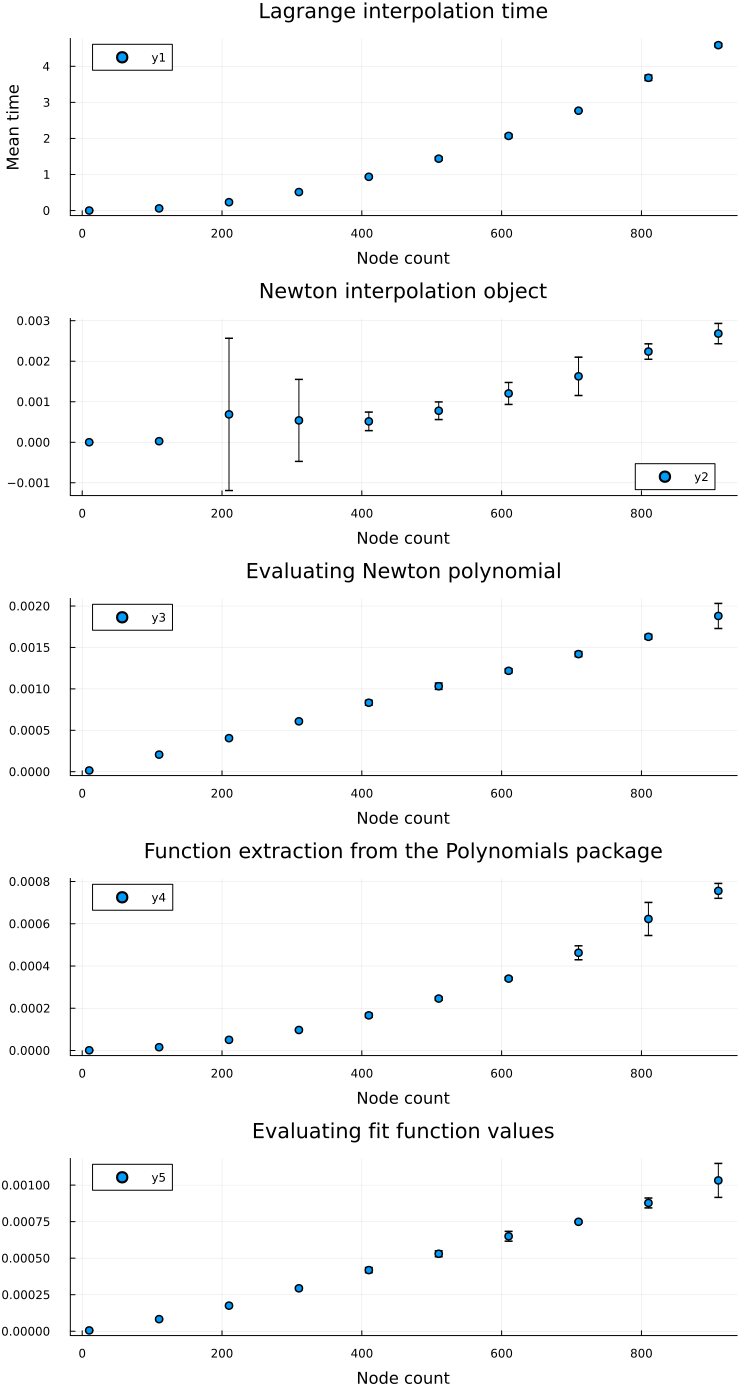

In [21]:
scatter(
    df2.Nodes, 
    size = (750, 1400), 
    xlabel = "Node count",
    ylabel = "Mean time",
    [df2.Lagr_mean, df2.Newt_mean, df2.Newt_point_mean, df2.Polyn_mean, df2.Polyn_point_mean], 
    title = ["Lagrange interpolation time" "Newton interpolation object" "Evaluating Newton polynomial" "Function extraction from the Polynomials package" "Evaluating fit function values"], 
    yerr = [df2.Lagr_std df2.Newt_std df2.Newt_point_std df2.Polyn_std df2.Polyn_point_std], 
    layout = grid(5,1),
)

# Neville's Algorithm

In [ ]:
xsf = 0:1:10
ysf = [rand() for x in xsf]

function Neville(xsf, ysf, x)
    n = size(xsf)[1]
    t = zeros(Float64, n, n)
    for i in 1:n
        t[i, 1] = ysf[i]
    end
    for i= 2:n
        for k = i:n
            t[k, i] = ((x - xsf[k]) * t[k-1, i-1] - (x - xsf[k - i+1]) * t[k, i-1]) / (xsf[k - i+1] - xsf[k])
        end
    end
    return t[n, n]
end

# Test points chosen to avoid xsf values, cover the full range, and check behavior near edges
tests = [1.5, 2.77, 3.543, 9.8, 6.66]

data = [(
    x = x,
    neville = Neville(xsf, ysf, x),
    lagrange = Lagrange(xsf, ysf, x),
    difference = abs(Neville(xsf, ysf, x) - Lagrange(xsf, ysf, x))
) for x in tests]

df = DataFrame(data)

# The changes are very small, mostly because of floating-point precision
println(df)

5×4 DataFrame
 Row │ x        neville    lagrange   difference  
     │ Float64  Float64    Float64    Float64     
─────┼────────────────────────────────────────────
   1 │   1.5    -0.392194  -0.392194  1.66533e-16
   2 │   2.77    0.540409   0.540409  1.11022e-16
   3 │   3.543   0.138747   0.138747  2.77556e-17
   4 │   9.8     1.80537    1.80537   0.0
   5 │   6.66    0.101416   0.101416  0.0


# Runge effect

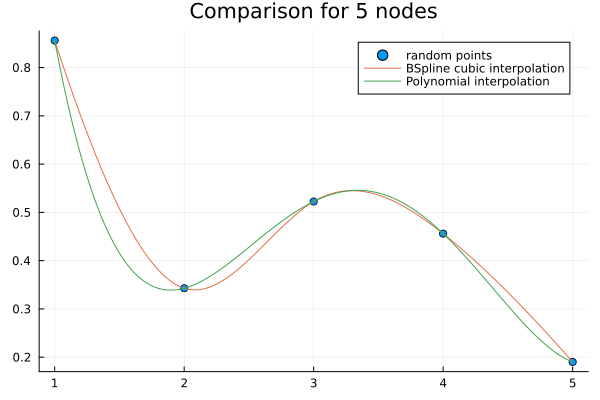

In [16]:
xs = 1:5
ys = [rand() for x in xs]
xsf = 1:0.01:5
scatter(xs, ys, label="random points")

f1 = interpolate(ys, BSpline(Cubic(Natural(OnCell()))))
ysf1=[f1(x) for x in xsf]
plot!(xsf,ysf1, label="BSpline cubic interpolation")

f2 = fit(xs,ys)
ysf2=[f2(x) for x in xsf]
plot!(xsf,ysf2, label="Polynomial interpolation", title="Comparison for 5 nodes")


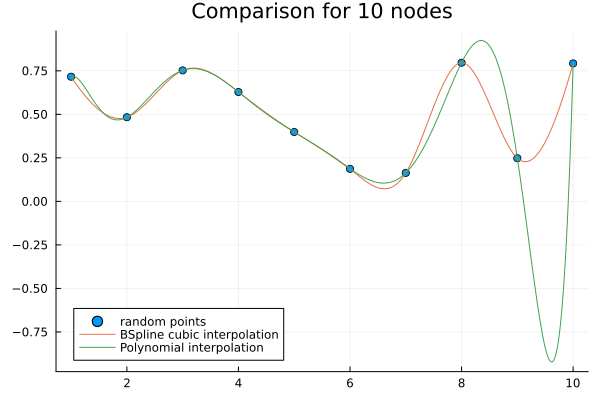

In [ ]:
xs2 = 1:10
ys2 = [rand() for x in xs2]
xsf2 = 1:0.01:10
scatter(xs2,ys2,label="random points")

f3 = interpolate(ys2, BSpline(Cubic(Natural(OnCell()))))
ysf3=[f3(x) for x in xsf2]
plot!(xsf2,ysf3, label="BSpline cubic interpolation")

f4 = fit(xs2,ys2)
ysf4=[f4(x) for x in xsf2]
plot!(xsf2,ysf4, label="Polynomial interpolation", title="Comparison for 10 nodes")

# We can observer Runge effect here, especially at the edge of plot. This is happening because of increased number of nodes